In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [3]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_reportedby from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df = df.dropna()
df.head()

,inc_reportedby
2,Other
3,Other (Nurse / Midwife )
4,Nurse
5,Nurse
6,Nurse


In [4]:
reportedby_counts = df['inc_reportedby'].value_counts()
print(reportedby_counts)
reportedby_counts = reportedby_counts.drop('',axis=0)
thresh = 8
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]
reportedby_counts_max = reportedby_counts.max()
plt.figure(figsize=(17,13))
cm = plt.get_cmap('RdYlGn')
cm_subsection = np.linspace(0, 1, len(reportedby_counts.values))
x_range = range(0,len(reportedby_counts.values))
colors = [cm(x) for x in cm_subsection]
reportedby_list = list(reportedby_counts.index)
reportedby_list_newlines = [i.replace(' ','\n') for i in reportedby_list]
num_newlines = [len(x) for x in reportedby_list_newlines]
up_or_down = [60 if x%2==0 else -320 for x in range(len(reportedby_list))]
vertical_alignment = ['bottom' if x%2==0 else 'top' for x in range(len(reportedby_list))]
for i in x_range:
    plt.scatter(i,reportedby_counts.values[i],color=colors[i],label=list(reportedby_counts.index)[i])
    #plt.text(i,reportedby_counts.values[i]+10,reportedby_list_newlines[i],ha='center',va='bottom')
    plt.annotate(reportedby_list_newlines[i], xy=(i,reportedby_counts.values[i]), xytext=(i,reportedby_counts.values[i]+up_or_down[i]), 
                 ha='center', va='bottom',
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x_range,np.zeros(len(x_range)),'--')
plt.legend(frameon=False)
plt.xticks([])
#plt.ylim(bottom=0)
plt.ylabel("number reported by")
plt.title("number of medicine patient safety events reported by different staff roles")

                                                        5126
Nurse                                                   2318
Pharmacist                                               771
Pharmacy technician                                      253
Administration / clerical / reception staff              178
Midwife                                                  164
Physician                                                114
Doctor (unknown grade)                                    75
Radiographer                                              58
Health Care Support Worker (HCSW)                         37
Pharmacy staff in training                                36
Anaesthetist                                              31
Foundation Year Doctor (First Year) (FY1)                 29
Dietician                                                 28
Other (Allied health professional)                        27
Other (Nurse / Midwife )                                  23
Manager                 

Text(0.5, 1.0, 'number of medicine patient safety events reported by different staff roles')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0AC1B618> (for post_execute):


ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 1224x936 with 1 Axes>

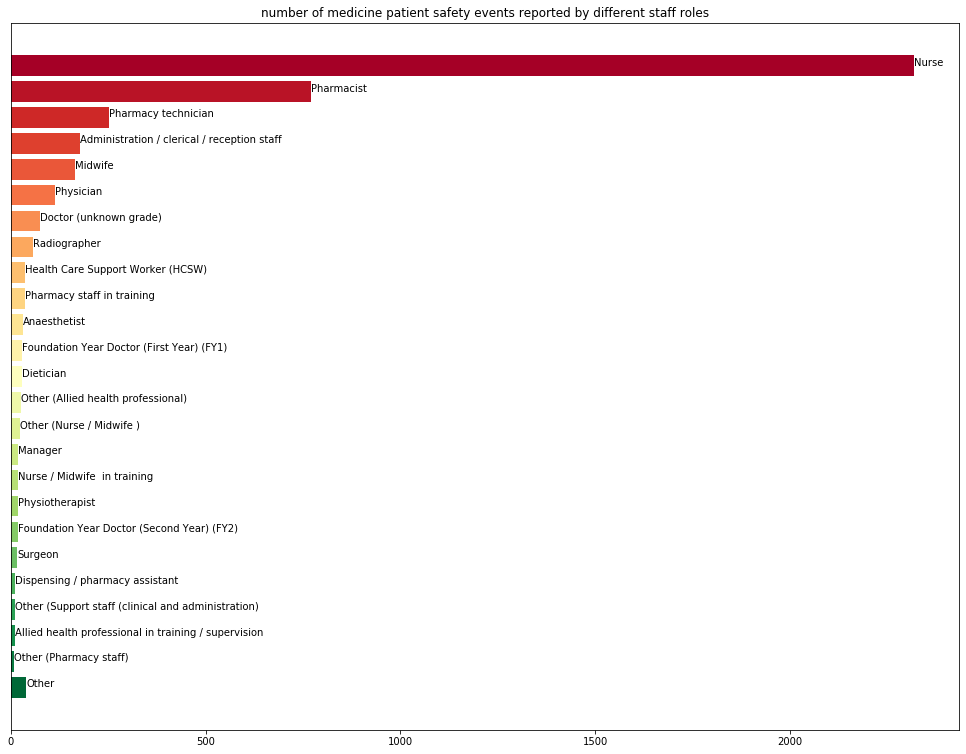

In [5]:
reportedby_counts = df['inc_reportedby'].value_counts()
reportedby_counts = reportedby_counts.drop('',axis=0)
thresh = reportedby_counts[reportedby_counts.index == 'Other'].values[0] + 1
reportedby_counts = reportedby_counts.append(pd.Series(reportedby_counts[reportedby_counts.values < thresh].sum(),index=['Other']))
reportedby_counts = reportedby_counts[reportedby_counts.values >= thresh]
plt.figure(figsize=(17,13))
cm = plt.get_cmap('RdYlGn')
cm_subsection = np.linspace(0, 1, len(reportedby_counts.values))
x_range = range(0,len(reportedby_counts.values))
colors = [cm(x) for x in cm_subsection]
reportedby_list = list(reportedby_counts.index)
for i in x_range:
    plt.barh(reportedby_list[-(i+1)],reportedby_counts.values[-(i+1)],color=colors[-(i+1)])
    plt.text(reportedby_counts.values[-(i+1)],i,reportedby_list[-(i+1)])
plt.yticks([])
plt.title("number of medicine patient safety events reported by different staff roles");